In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import animation
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

In [2]:
vec_env = make_vec_env("CartPole-v1")

In [3]:
def save_frames_as_gif(frames, path="./", filename="gym_animation.gif"):
    plt.figure(
        figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72
    )
    patch = plt.imshow(frames[0])
    plt.axis("off")

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(
        plt.gcf(), animate, frames=len(frames), interval=50
    )
    anim.save(path + filename, writer="imagemagick", fps=60)

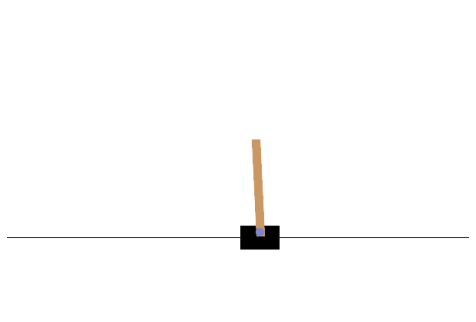

In [4]:
model = PPO.load("models/ppo_cartpole")

obs = vec_env.reset()
frames = []
for t in range(100):
    frames.append(vec_env.render(mode="rgb_array"))
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)

save_frames_as_gif(frames, "./gifs/", "ppo_cartpole.gif")